In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch


# First Fig

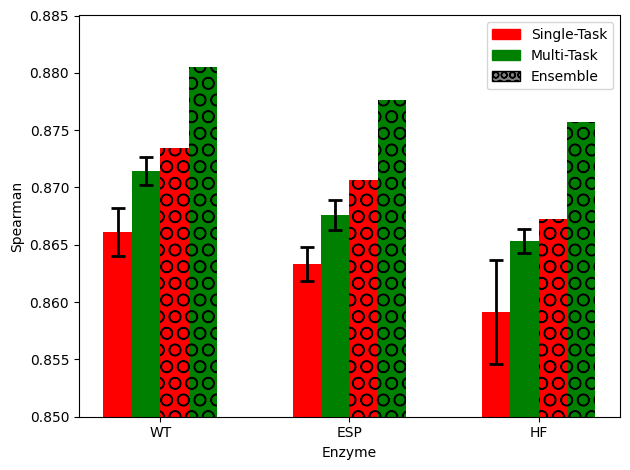

In [7]:
# Adjusted sample data to match the new order
data = {
    'WT': [(0.866129327, 0.002073498), (0.871410252, 0.001224376), (0.873438202, None), (0.880479122, None)],
    'ESP': [(0.863328868, 0.001447701), (0.867588501, 0.001287511), (0.870692818, None), (0.877605318, None)],
    'HF': [(0.859150978, 0.004511548), (0.865328354, 0.001006483), (0.867265678, None), (0.875705564, None)],
}

approaches = ['ST No Ens', 'MT No Ens', 'ST Ens', 'MT Ens']

# Plot setup
num_enzymes = len(data)
num_approaches = len(approaches)
index = np.arange(num_enzymes)  # Enzyme indices
bar_width = 0.15  # Width of a single bar

fig, ax = plt.subplots()

# Colors and patterns adjusted for the new order
colors = ['red', 'green', 'red', 'green']
hatch_patterns = ['', '', 'O', 'O']  # Circles for ensemble

for i, approach in enumerate(approaches):
    means = [data[enzyme][i][0] for enzyme in data]
    stds = [data[enzyme][i][1] if data[enzyme][i][1] is not None else 0 for enzyme in data]
    bars = ax.bar(index + i*bar_width, means, bar_width, color=colors[i], 
                  label=approach, hatch=hatch_patterns[i])
    # Add error bars only if standard deviation is provided
    error_config = {'elinewidth': 2, 'capsize': 5, 'capthick': 2, 'fmt': 'none', 'color': 'black'}
    for j, std in enumerate(stds):
        if std > 0:  # Check if std is not zero, indicating it was provided
            ax.errorbar(index[j] + i*bar_width, means[j], yerr=std, **error_config)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Enzyme')
ax.set_ylabel('Spearman')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(list(data.keys()))

# Custom legend for task and ensemble type, with adjustments
legend_elements = [
    mpatches.Patch(color='red', label='Single-Task'),
    mpatches.Patch(color='green', label='Multi-Task'),
    mpatches.Patch(facecolor='grey', edgecolor='k', hatch='OO', label='Ensemble')
]
ax.legend(handles=legend_elements, loc='upper right')

ax.set_ylim(0.850, 0.885)
plt.tight_layout()
plt.show()